In [1]:
#directory "_build"
#load "matrix.cmo"
#require "jupyter-archimedes"
#use "matrix.ml"
#use "perceptron.ml"

/home/austinw/.opam/cs3110-2021sp/lib/ocaml/unix.cma: loaded
/home/austinw/.opam/cs3110-2021sp/lib/ocaml/bigarray.cma: loaded
/home/austinw/.opam/cs3110-2021sp/lib/cairo2: added to search path
/home/austinw/.opam/cs3110-2021sp/lib/cairo2/cairo.cma: loaded
/home/austinw/.opam/cs3110-2021sp/lib/ocaml/dynlink.cma: loaded
/home/austinw/.opam/cs3110-2021sp/lib/ocaml/camlp4: added to search path
/home/austinw/.opam/cs3110-2021sp/lib/archimedes: added to search path
/home/austinw/.opam/cs3110-2021sp/lib/archimedes/archimedes_internals.cma: loaded
/home/austinw/.opam/cs3110-2021sp/lib/archimedes/archimedes_toploop.cma: loaded


Cannot find file graphics.cma.
Cannot find file archimedes_graphics.cma.


Module Archimedes loaded and aliased as A.
/home/austinw/.opam/cs3110-2021sp/lib/archimedes/archimedes_cairo.cma: loaded
/home/austinw/.opam/cs3110-2021sp/lib/bytes: added to search path
/home/austinw/.opam/cs3110-2021sp/lib/base64: added to search path
/home/austinw/.opam/cs3110-2021sp/lib/base64/base64.cma: loaded
/home/austinw/.opam/cs3110-2021sp/lib/ocaml/compiler-libs: added to search path
/home/austinw/.opam/cs3110-2021sp/lib/ocaml/compiler-libs/ocamlcommon.cma: loaded
/home/austinw/.opam/cs3110-2021sp/lib/result: added to search path
/home/austinw/.opam/cs3110-2021sp/lib/result/result.cma: loaded
/home/austinw/.opam/cs3110-2021sp/lib/ppx_deriving/runtime: added to search path
/home/austinw/.opam/cs3110-2021sp/lib/ppx_deriving/runtime/ppx_deriving_runtime.cma: loaded
/home/austinw/.opam/cs3110-2021sp/lib/ppx_deriving_yojson/runtime: added to search path
/home/austinw/.opam/cs3110-2021sp/lib/ppx_deriving_yojson/runtime/ppx_deriving_yojson_runtime.cma: loaded
/home/austinw/.opam/cs

type t = { dimensions : int * int; matrix : float list list; }
exception InvalidDimensions of string
val dim : t -> int * int = <fun>
val matrix : t -> float list list = <fun>
val fill : int -> int -> float -> t = <fun>
val zero : int -> int -> t = <fun>
val eye : int -> t = <fun>
val transpose : t -> t = <fun>
val mult : t -> t -> t = <fun>
val to_array : 'a list list -> 'a array array = <fun>
val to_list : 'a array array -> 'a list list = <fun>
val swap : 'a array -> int -> int -> unit = <fun>
val rref : t -> t = <fun>
val construct : float list list -> t = <fun>
val lu_decomp : t -> t * t = <fun>
val concat : t -> t -> t = <fun>
val invert : t -> t = <fun>
val scale : t -> float -> t = <fun>
val det : t -> float = <fun>
val magnitude : t -> float = <fun>
val normalize : t -> t = <fun>
val eigen : t -> bool -> float * t = <fun>
val elem_pow : t -> float -> t = <fun>
val pinv : t -> t = <fun>
val op : t -> t -> (float -> float -> float) -> t = <fun>
val dot : t -> t -> float = <fun>
v

In [9]:
let rec gen_x acc n = if n = 0 then acc else gen_x ((1.0 -. Random.float 2.0) :: acc) (n-1) 
let x = gen_x [] 100
let y = gen_x [] 100 
let f x y = if y > 0.8 *. x +. 0.4 then 1.0 else 0.0
let rec gen_pp x_acc y_acc u_acc l_acc = 
    match x_acc with 
    | [] -> (u_acc, l_acc)
    | x :: xs -> 
        match y_acc with 
            | [] -> assert false
            | y :: ys -> if f x y = 1.0 then gen_pp xs ys (u_acc @ [(x, y)]) l_acc 
                         else gen_pp xs ys u_acc (l_acc @ [(x, y)])
let pp = gen_pp x y [] []
let u_pp = fst pp 
let l_pp = snd pp
let rec gen_labels x_acc y_acc l_acc = 
    match x_acc with 
    | [] -> l_acc
    | x :: xs -> 
        match y_acc with 
            | [] -> assert false
            | y :: ys -> gen_labels xs ys (l_acc @ [f x y])
let labels = [gen_labels x y []] |> construct |> transpose 
let x = [x] |> construct |> transpose 
let y = [y] |> construct |> transpose 
let data = concat x y 
let w = train data 0.001 labels |> matrix 
let f' x = let [w0 :: w1 :: [w2]] = w in (-1.) *. (w1 *. x +. w0) /. w2

val gen_x : float list -> int -> float list = <fun>


val x : float list =
  [0.477062069633257146; 0.173647789993747081; 0.322354287743959134;
   -0.117974105580602062; -0.603499482097134; 0.789292817263204216;
   0.961541532408478838; -0.764996953425145731; -0.72072222607876224;
   -0.0905844580873813587; 0.0984303844070483214; -0.117052388132868668;
   -0.322767904252171833; -0.270993874001434154; 0.916002534295478399;
   -0.356052104324337648; -0.119615887477519722; -0.188574513741683658;
   0.519378150825951; -0.295975310896480881; 0.471091499467940045;
   0.667023734594671458; 0.70026822128210986; -0.490697594844513141;
   0.468703243110058509; 0.106260425273973502; 0.0619721932419492472;
   -0.678252829785165767; 0.928844452251809338; 0.9500294697166074;
   0.377041412394887; 0.985091079564257566; 0.838876413069378435;
   0.611267893134213147; 0.159766986059318161; 0.365538566187059821;
   -0.095853707066079652; 0.640943231289962778; 0.42827301386190253;
   -0.059089458301740283; 0.830771107558037625; 0.486844478406701;
   -0.41399

val y : float list =
  [0.567822198982675275; -0.738478665392554801; -0.511802239361812461;
   0.099353055632871; -0.358177859546828126; -0.76448491089299675;
   0.74520687907705685; -0.961331247268220279; -0.473585053080864071;
   0.926848684365742193; -0.555334151607274062; 0.254127046400801637;
   0.986874135440850786; -0.512047433123364426; 0.679600239045423438;
   -0.433582634065734052; -0.751628518936219514; 0.342983498697212341;
   0.872020683677527164; 0.580075327403728358; -0.465013945786432403;
   -0.524838247032304306; -0.405149336444932562; -0.969998778781474114;
   0.908014705360675856; -0.352334387896865; 0.503463275261257559;
   0.245090156723082098; 0.394977300571758505; 0.493328980165674613;
   -0.891657814717182751; 0.595137114206278461; 0.238786940062116981;
   -0.117885481176305706; 0.00269577051088243369; 0.0600250256555224793;
   0.377801422005569543; -0.724793314223206364; 0.620249707026491182;
   0.0850392506109420854; -0.148295118162933504; 0.690271640833885369

val f : float -> float -> float = <fun>


val gen_pp :
  float list ->
  float list ->
  (float * float) list ->
  (float * float) list -> (float * float) list * (float * float) list = <fun>


val pp : (float * float) list * (float * float) list =
  ([(-0.0905844580873813587, 0.926848684365742193);
    (-0.322767904252171833, 0.986874135440850786);
    (-0.188574513741683658, 0.342983498697212341);
    (0.519378150825951, 0.872020683677527164);
    (-0.295975310896480881, 0.580075327403728358);
    (0.468703243110058509, 0.908014705360675856);
    (0.0619721932419492472, 0.503463275261257559);
    (-0.678252829785165767, 0.245090156723082098);
    (-0.095853707066079652, 0.377801422005569543);
    (-0.038367266830305, 0.868218184237654622);
    (-0.546493062124538076, 0.0438514351863214);
    (0.365847480309412276, 0.991424952465122855);
    (0.33465826662808229, 0.875891128261155893);
    (-0.985414607164095, 0.186778822504451658);
    (-0.876051883056924385, 0.494094231386490557);
    (-0.267464123940805765, 0.367271556678055111);
    (-0.738290568162351279, 0.624639354210694);
    (-0.23905964962088011, 0.737920513830981);
    (-0.568189786259816643, 0.362173270672315195)

val u_pp : (float * float) list =
  [(-0.0905844580873813587, 0.926848684365742193);
   (-0.322767904252171833, 0.986874135440850786);
   (-0.188574513741683658, 0.342983498697212341);
   (0.519378150825951, 0.872020683677527164);
   (-0.295975310896480881, 0.580075327403728358);
   (0.468703243110058509, 0.908014705360675856);
   (0.0619721932419492472, 0.503463275261257559);
   (-0.678252829785165767, 0.245090156723082098);
   (-0.095853707066079652, 0.377801422005569543);
   (-0.038367266830305, 0.868218184237654622);
   (-0.546493062124538076, 0.0438514351863214);
   (0.365847480309412276, 0.991424952465122855);
   (0.33465826662808229, 0.875891128261155893);
   (-0.985414607164095, 0.186778822504451658);
   (-0.876051883056924385, 0.494094231386490557);
   (-0.267464123940805765, 0.367271556678055111);
   (-0.738290568162351279, 0.624639354210694);
   (-0.23905964962088011, 0.737920513830981);
   (-0.568189786259816643, 0.362173270672315195);
   (-0.425361114400089946, 0.060337191

val l_pp : (float * float) list =
  [(0.477062069633257146, 0.567822198982675275);
   (0.173647789993747081, -0.738478665392554801);
   (0.322354287743959134, -0.511802239361812461);
   (-0.117974105580602062, 0.099353055632871);
   (-0.603499482097134, -0.358177859546828126);
   (0.789292817263204216, -0.76448491089299675);
   (0.961541532408478838, 0.74520687907705685);
   (-0.764996953425145731, -0.961331247268220279);
   (-0.72072222607876224, -0.473585053080864071);
   (0.0984303844070483214, -0.555334151607274062);
   (-0.117052388132868668, 0.254127046400801637);
   (-0.270993874001434154, -0.512047433123364426);
   (0.916002534295478399, 0.679600239045423438);
   (-0.356052104324337648, -0.433582634065734052);
   (-0.119615887477519722, -0.751628518936219514);
   (0.471091499467940045, -0.465013945786432403);
   (0.667023734594671458, -0.524838247032304306);
   (0.70026822128210986, -0.405149336444932562);
   (-0.490697594844513141, -0.969998778781474114);
   (0.106260425273973

val gen_labels : float list -> float list -> float list -> float list = <fun>


val labels : Matrix.t = <abstr>


val x : Matrix.t = <abstr>


val y : Matrix.t = <abstr>


val data : Matrix.t = <abstr>


val w : float list list =
  [[-0.167336660629065936; -0.335421254587334; 0.424566442992315496]]


File "[9]", line 28, characters 11-71:
28 | let f' x = let [w0 :: w1 :: [w2]] = w in (-1.) *. (w1 *. x +. w0) /. w2
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Warning 8: this pattern-matching is not exhaustive.
Here is an example of a case that is not matched:
((_::_::_::[])::_::_|(_::_::_::_::_)::_|(_::_::[])::_|(_::[])::_|[]::_|[])


val f' : float -> float = <fun>


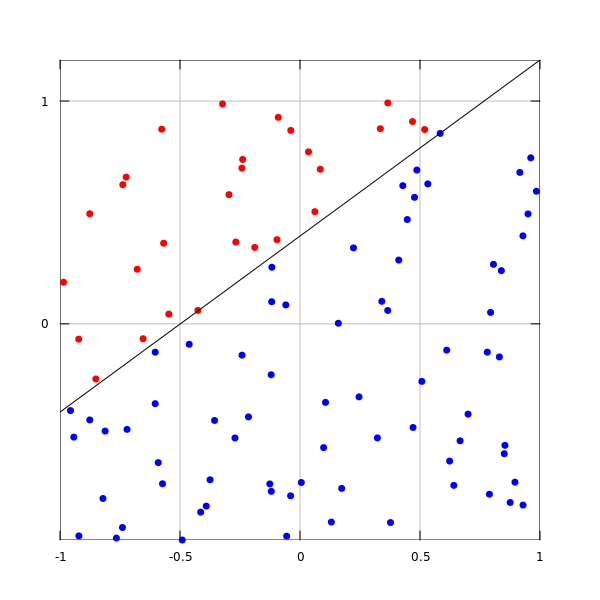

- : unit = ()


In [11]:
(* Plot using Archimedes *)
let vp = A. init ~w:600. ~h:600. ["jupyter"] in
    A.Axes.box vp ;
    A.set_color vp A.Color.red ;
    A.List.xy_pairs vp u_pp ;
    A.set_color vp A.Color.blue ;
    A.List.xy_pairs vp l_pp ;
    A.set_color vp A.Color.black ;
    A.fx vp f' (-1.0) 1.0 ;
    A.close vp 